$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Vignette to use singletCode Command Line tool to analyse single-cell data with watermelon barcodes

The barcode region is assumed to be amplified using Illumina MiSeq.

All the data for this vignette and the files output from it can be
downloaded
[here](https://github.com/GoyalLab/SingletCodeWebsite/raw/main/source/dataVignette/watermelonVignetteData.zip).
It contains inputFiles and the outputFiles (it contains a test folder
which has the expected output files). This vignette can be downloaded as
a jupyter notebook from the [singletCode Tools
repo](https://github.com/GoyalLab/singletCodeTools/tree/main/vignette).

## Installing singletCode Command line tool

To use the singletCode command line tool, clone the repository from
GitHub. Let the Path to the folder you are running this command be
**Path**. We can also install other packages needed to run the tool.

In [ ]:
!git clone https://github.com/GoyalLab/singletCodeTools
Path = "path/to/singletCodeTools/repo"
%conda install scipy tqdm matplotlib biopython python-levenshtein pandas

## Next step is to understand the samples present in the FASTQ files.

The sample fastq files are in the inputFolder. We can identify the
sample name and number from the FASTQ file. For example,
sampleName\_S1\_L001\_R1\_001.fastq.gz means that the sample name is
sampleName and sample number is 1.Make sure that both read 1 and read 2
for each sample are present in the same folder (R1 and R2)

## Creating sample sheet for these two samples.

In [2]:
import pandas as pd

In [3]:
p = "path/to/downloaded/and/unzipped/data"

In [4]:
sampleSheet = pd.read_csv(f"{p}/inputFiles/sampleSheet.csv")
sampleSheet

,sampleName,sampleNumber
0,sampleName,1
1,otherSampleName,2


Now, to run the watermelon module of singletCodeTools, you need to run
this command. If we are going by the folder structure of the zipped file
and **p** is *path to the unzipped folder containing example files*,
then 1. **inputFolder** will be p/inputFiles/ 2. **outputFolder** will
be p/outputFiles/ 3. **sampleSheet** will be
p/inputFiles/sampleSheet.csv

In [5]:
import subprocess

command = [
    'python',
    f'{Path}/commandLine/singletCodeCommandLine.py',
    'watermelon',
    '-i',  f'{p}/inputFiles',
    '-o',  f'{p}/outputFiles',
    '-s', f'{p}/inputFiles/sampleSheet.csv',
    '--outputName', 'watermelonBarcodeUmi.csv'
]

result = subprocess.run(command)

Arguments received:
  command: watermelon
  inputFolder: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/inputFiles
  outputFolder: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/outputFiles
  sampleSheet: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/inputFiles/sampleSheet.csv
  outputName: watermelonBarcodeUmi.csv
  use10X: False
  input10X: None
All the inputs for the command are valid and will proceed with creating the barcode sheet for all the samples in the sheet.
Filtered rows of dataframe: 940
Filtered rows of dataframe: 718


In [6]:
result = subprocess.run([
    'python',
    f'{Path}/commandLine/singletCodeCommandLine.py',
    'watermelon',
    '-i', f'{p}/inputFiles/',
    '-o', f'{p}/outputFiles/',
    '-s', f'{p}/inputFiles/sampleSheet.csv',
    '--outputName', 'watermelonBarcodeUmiWith10X.csv',
    '--use10X',
    '--input10X', f'{p}/inputFiles/barcodes.tsv'
], capture_output=True, text=True)

# Check if the command was successful
if result.returncode == 0:
    print("Command executed successfully")
    print("Output:\n", result.stdout)
else:
    print("Command failed")
    print("Error:\n", result.stderr)

Command executed successfully
Output:
 Arguments received:
  command: watermelon
  inputFolder: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/inputFiles/
  outputFolder: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/outputFiles/
  sampleSheet: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/inputFiles/sampleSheet.csv
  outputName: watermelonBarcodeUmiWith10X.csv
  use10X: True
  input10X: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/inputFiles/barcodes.tsv
All the inputs for the command are valid and will proceed with creating the barcode sheet for all the samples in the sheet.
Filtered rows of dataframe: 791
Filtered rows of dataframe: 629



In [7]:
import subprocess

result = subprocess.run([
    'python',
    f'{Path}/commandLine/singletCodeCommandLine.py',
    'count',
    '-i', f'{p}/outputFiles/watermelonBarcodeUmiWith10X.csv',
    '-o', f'{p}/outputFiles/watermelon'
], capture_output=True, text=True)

# Check if the command was successful
if result.returncode == 0:
    print("Command executed successfully")
    print("Output:\n", result.stdout)
else:
    print("Command failed")
    print("Error:\n", result.stderr)

Command executed successfully
Output:
 Arguments received:
  command: count
  input_file: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/outputFiles/watermelonBarcodeUmiWith10X.csv
  out_prefix: /home/keerthana/Goyal_Lab/websiteToolData/thingsToAddToWebsite/watermelonVignetteData/watermelonVignetteData/outputFiles/watermelon
  umi_cutoff_ratio: 7.5e-06
  umi_diff_threshold: 50
  dominant_threshold: 10
  min_umi_good_data_cutoff: 2
INFO: Raw data counts
sampleNum
sampleName         693
otherSampleName    524
Name: count, dtype: int64
INFO: Using raio based filtering.
Current Sample Adjusted UMI cutoff: 2
Total cells: 45
Sample sampleName singlet: 43
Total Singlets: 43
Total Multiplets: 1
All singlets identified are unique? True
Total Singlets: 43
Total Multiplets: 1
INFO: Using raio based filtering.
Current Sample Adjusted UMI cutoff: 2
Total cells: 22
Sample otherSampleName singlet: 22
Total Singlets: 22
Total Multiplets: 0


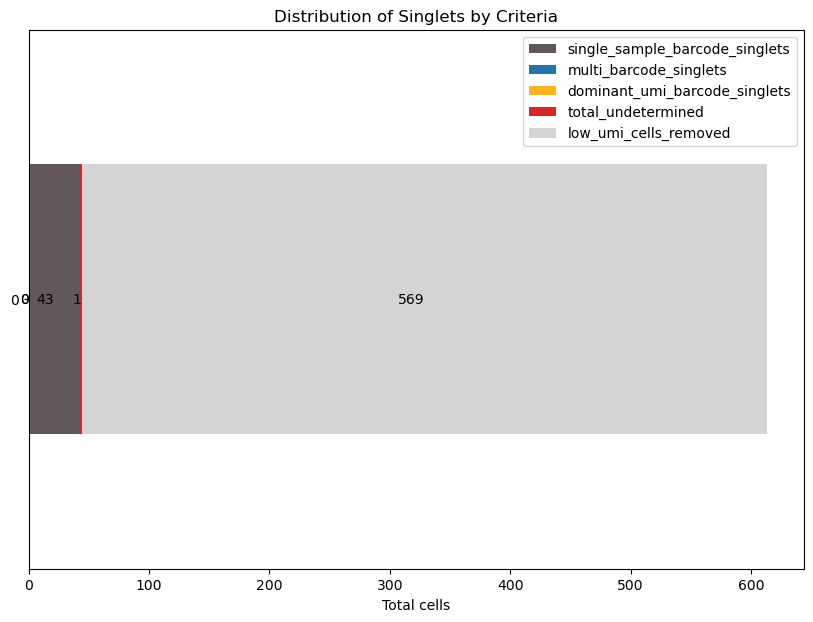

In [8]:
import matplotlib.pyplot as plt

stats = pd.read_csv(f"{p}/outputFiles/watermelon_sampleName_singlets_stats.csv")
colors = ['#62575b', '#2175a8', '#feb422', '#d62728', '#d4d4d4']  # Example colors, modify as needed
plotData = stats.drop(columns = ['dataset', 'total_cells', "total_singlets"])

# Plotting
ax = plotData.plot(kind='barh', stacked=True, figsize=(10, 7), color=colors)

for plot in ax.patches:
    ax.annotate(f'{int(plot.get_width())}', (plot.get_x() + plot.get_width()/2, plot.get_y() + plot.get_height()/2), ha='right', va='center')

ax.set_xlabel('Total cells')
ax.set_title('Distribution of Singlets by Criteria')
plt.show()

In the above plot, you see that the original data had 569 cells that
were removed due to low barcode UMI count, 43 singlets with a
single-barcode associated with them and 1 multiplet (singletCode could
not determine if it was a singlet for sure.)

### Looking at the scRNAseq data associated

Since this data has both scRNAseq and barcodes for the same cells, we
can analyse them together

Installing and importing scanpy package to do this

In [9]:
#Install scanpy for further single-cell RNAseq analysis
# %conda install -c conda-forge scanpy python-igraph leidenalg
#Import scanpy
import scanpy as sc

In case there are version conflicts during this installation or while
importing scanpy, we found *%conda update --all* to be an useful command
that fixed the version conflict previously. Reading in the 10X h5ad
object associated with the same watermelon data

In [10]:
adata = sc.read_h5ad(f"{p}/inputFiles/watermelonScRnaSeqData.h5ad")
adata

AnnData object with n_obs × n_vars = 1093 × 27264

## Read in the output files to identify cells as being singlets, multiplets or being removed for low barcode UMI threshold

First, reading in the cellID-barcode-UMI sheet generated earlier with
additional filter using scRNAseq data

In [11]:
cellidBarcodeUMI = pd.read_csv(f'{p}/outputFiles/watermelonBarcodeUmiWith10X.csv')

Reading in all the singlets and multiplets idenified in the two samples.
There might not always be multiplets - check the stats file to see if
there are any. In this example, there are no multiplets in
otherSampleName.

In [12]:
sampleNameSinglets = pd.read_csv(f"{p}/outputFiles/watermelon_sampleName_singlets_all.txt", header = None)
otherSampleNameSinglets = pd.read_csv(f"{p}/outputFiles/watermelon_otherSampleName_singlets_all.txt", header = None)
sampleNameMultiplets = pd.read_csv(f"{p}/outputFiles/watermelon_sampleName_multiplets.txt", header = None)

Identifying the cells that were below the barcode UMI threshold and were
filtered out by singletCode

In [13]:
lowUmiCells = cellidBarcodeUMI[~(cellidBarcodeUMI['cellID'].isin(sampleNameSinglets[0]) | 
                                 cellidBarcodeUMI['cellID'].isin(otherSampleNameSinglets[0]) | 
                                 cellidBarcodeUMI['cellID'].isin(sampleNameMultiplets[0]))]

## Annotating the cells in adata with these labels

In [14]:
#Annotating the adata with these labels using the lists created
adata.obs.loc[adata.obs.index.isin(sampleNameSinglets[0]), 'singletStatus'] = 'singlet'
adata.obs.loc[adata.obs.index.isin(otherSampleNameSinglets[0]), 'singletStatus'] = 'singlet'
adata.obs.loc[adata.obs.index.isin(sampleNameMultiplets[0]), 'singletStatus'] = 'multiplet'
adata.obs.loc[adata.obs.index.isin(lowUmiCells['cellID']), 'singletStatus'] = 'low UMI'

**Note** that in this vignette we are not doing any actual QC - but in
actual analysis, it would need to be done.

In [15]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

## Calculating PCA and UMAP for visualization

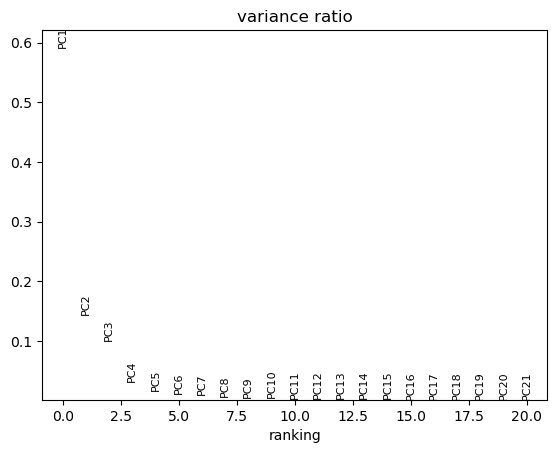

In [16]:
#Calculating PCA for the data and plotting variance ratio
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=20)

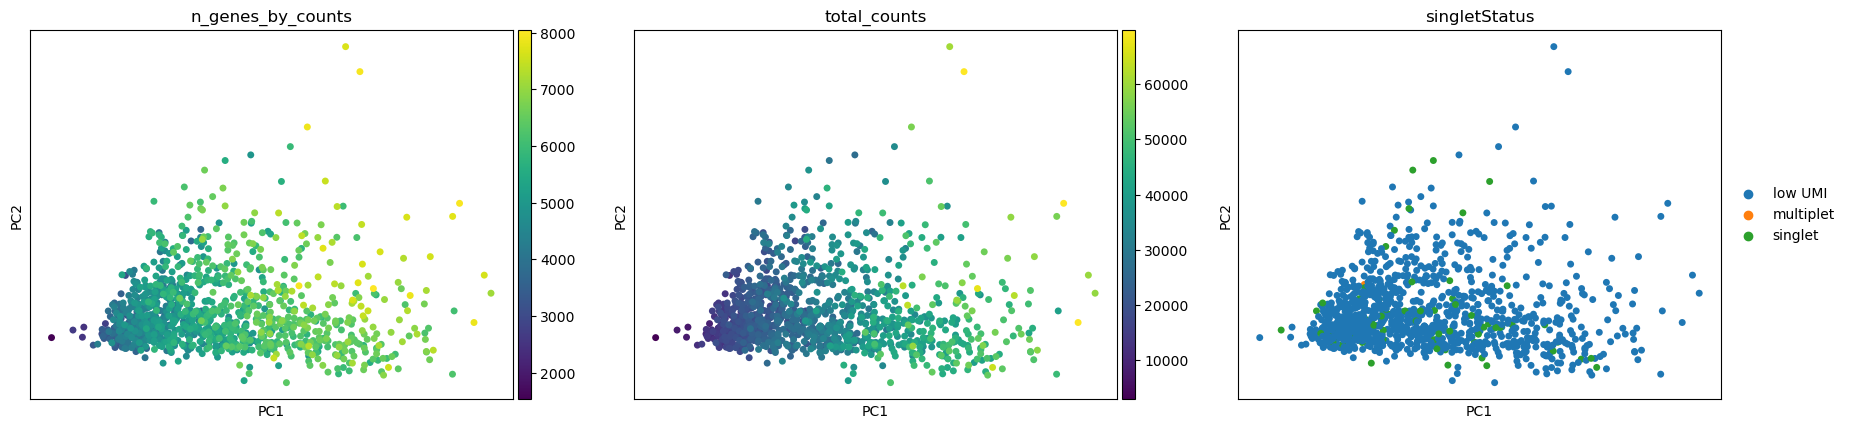

In [17]:
sc.pl.pca(
    adata,
    color = ['n_genes_by_counts', 'total_counts', 'singletStatus'],
    size = 100,
)

In [22]:
#Calculating neighbours and UMAP from that for further visualization
sc.pp.neighbors(adata)
sc.tl.umap(adata,random_state = 101010)

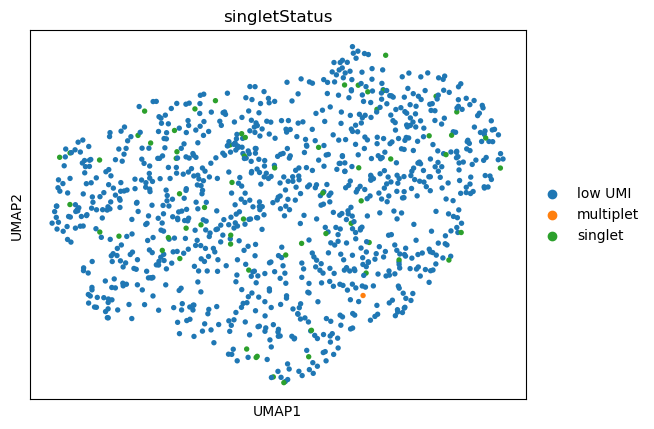

In [23]:
sc.pl.umap(
    adata,
    color=['singletStatus'],
    size=60
)

## Saving the final adata

In [ ]:
adata.write(f"{p}/outputFiles/watermelonScRNA.h5ad")